# Advanced Plotting with Python

In previous lectures, we have explored the fundamentals of data visualization using `matplotlib` and `pandas`. We learned how to create basic plots such as line plots, scatter plots, and histograms.

As data analysis becomes more sophisticated, there are often cases where we want to explore data in more complex ways:

- **3D Visualization**: When data has more than two dimensions, a 3D plot can reveal patterns and relationships that are difficult to see in 2D projections.
- **Statistical Plots**: Libraries like `seaborn` provide high-level interfaces to create publication-quality statistical graphics with minimal code.
- **Interactive Visualization**: `plotly` enables interactive, web-based visualizations that allow users to explore data dynamically.

In this lecture, we will explore these three powerful plotting approaches and learn how to combine them with pandas DataFrames for effective data exploration and communication.

## 3D Plotting with Matplotlib

Matplotlib's `mplot3d` toolkit enables the creation of 3D plots. This is particularly useful when you want to visualize three continuous variables simultaneously or show relationships between multiple dimensions.

To use 3D plotting capabilities, we need to import the necessary libraries.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize a random number generator for reproducibility
rng = np.random.default_rng(42)

### Creating a 3D Scatter Plot

Let's start by creating some sample 3D data and visualizing it with a scatter plot.

In [48]:
# Generate sample 3D data
n_points = 100

# Create a DataFrame with 3D coordinates and a color-coding variable
data_3d = pd.DataFrame({
    'x': rng.standard_normal(n_points),
    'y': rng.standard_normal(n_points),
    'z': rng.standard_normal(n_points),
    'category': rng.choice(['A', 'B', 'C'], n_points)
})

data_3d

,x,y,z,category
0,0.304717,-0.378163,0.337575,B
1,-1.039984,1.299228,1.407482,A
2,0.750451,-0.356264,0.090585,B
3,0.940565,0.737516,0.643939,B
4,-1.951035,-0.933618,-2.050172,B
...,...,...,...,...
95,-1.447112,-0.894727,0.176512,B
96,-1.322700,0.643327,0.295994,A
97,-0.997247,-0.394605,-0.371915,C
98,0.399774,-0.005122,-1.756722,C


Now let's create a 3D scatter plot. When we call `plt.figure()`, we specify `projection='3d'` to create a 3D axis.

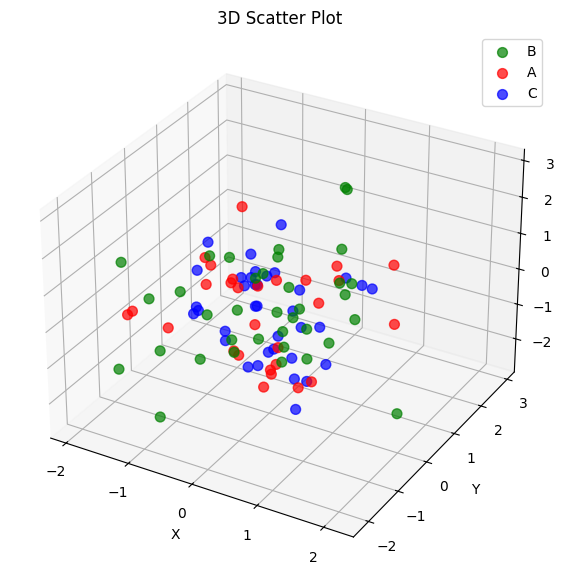

In [49]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each category with a different color
colors = {'A': 'red', 'B': 'green', 'C': 'blue'}

for category in data_3d['category'].unique():
    subset = data_3d[data_3d['category'] == category]
    ax.scatter(subset['x'], subset['y'], subset['z'], 
               label=category, color=colors[category], s=50, alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')
ax.legend()

plt.show()

### Creating a 3D Surface Plot

Surface plots are useful for visualizing functions of two variables, such as `z = f(x, y)`.

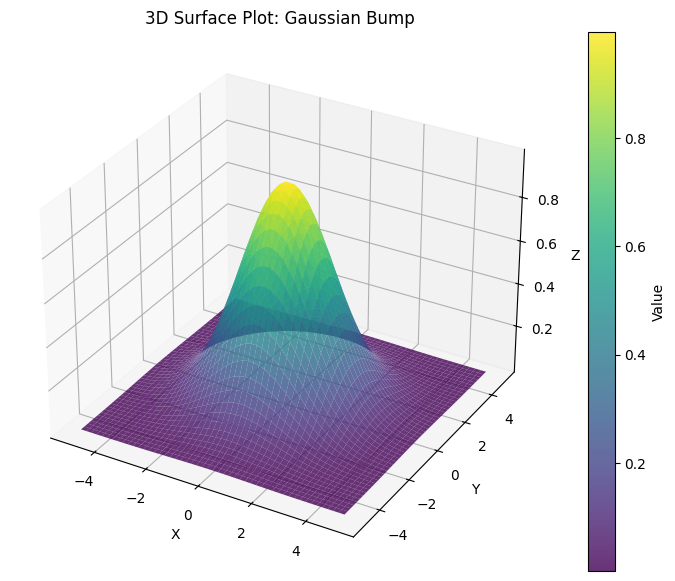

In [50]:
# Create a grid of x and y values
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Compute z values using a function (e.g., a Gaussian bump)
Z = np.exp(-(X**2 + Y**2) / 5)

# Create the 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a colormap
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot: Gaussian Bump')

# Add a colorbar
fig.colorbar(surf, ax=ax, label='Value')

plt.show()

### Controlling the Viewing Angle

One of the advantages of 3D plots in `matplotlib` is the ability to rotate the view. You can use the `view_init()` method to set the **elevation** and **azimuth angles**. These are defined as follows

##### Elevation Angle
Controls the *vertical* tilt of the viewing perspective. An elevation of 0° views the plot from the side, 90° views it from directly above, and negative values tilt the view downward.

##### Azimuth Angle
 Controls the *horizontal* rotation around the plot. It determines which direction you're "looking" at the 3D object. Common values are 0° (front view), 90° (right side), 180° (back view), and 270° (left side).

Together, these angles allow you to rotate a 3D plot to any desired perspective. For example:
- `view_init(elev=30, azim=45)` gives a standard 3D perspective view
- `view_init(elev=90, azim=0)` views the plot from directly above
- `view_init(elev=0, azim=0)` views it from the front at ground level

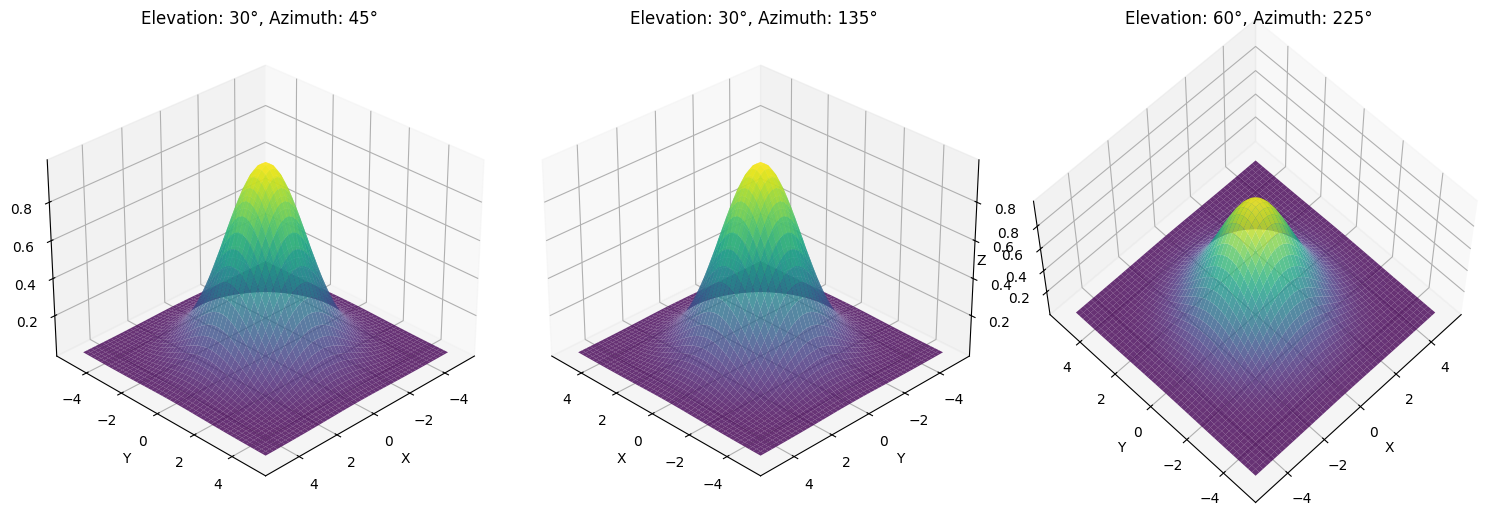

In [51]:
# Create multiple views of the same surface
fig = plt.figure(figsize=(15, 5))

angles = [(30, 45), (30, 135), (60, 225)]  # (elevation, azimuth)

for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Elevation: {elev}°, Azimuth: {azim}°')

plt.tight_layout()
plt.show()

## Statistical Plotting with Seaborn

`seaborn` is built on top of `matplotlib` and provides a higher-level interface for creating statistical graphics. It integrates well with pandas DataFrames and automatically handles common tasks like aggregating data, computing statistics, and creating legends.

Some key advantages of `seaborn` are:

- **Beautiful default styles**: Professional-looking plots out of the box
- **Statistical estimation**: Automatic computation of error bars, confidence intervals, and regression lines
- **Easy multi-plot grids**: Functions like `FacetGrid` for creating faceted plots
- **Color palettes**: Rich color palette options for categorical data


You can find th complete documentation for `seaborn` (with lots of examples) at [https://seaborn.pydata.org](https://seaborn.pydata.org)

In [52]:
import seaborn as sns

### Scatter Plots with Regression Lines

One of seaborn's most powerful functions is `regplot()`, which creates a scatter plot with a fitted line and confidence interval.

This is useful whn we want to find trends in the data. At the moment, this is a pure black box. We will see more about fitting in the next workshops.

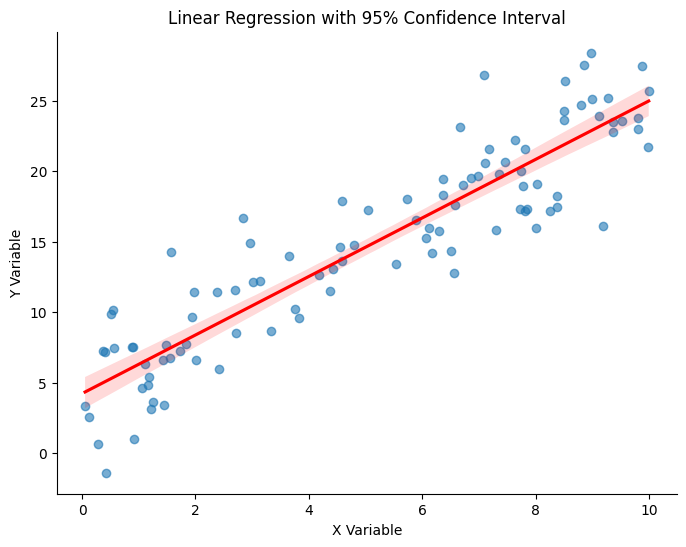

In [53]:
# Create sample data with a linear relationship plus noise
n = 100

regression_data = pd.DataFrame({
    'x': rng.uniform(0, 10, n),
    'y': rng.uniform(0, 10, n)
})

# Create a linear relationship with some noise
regression_data['y'] = 2 * regression_data['x'] + 5 + rng.normal(0, 3, n)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(data=regression_data, x='x', y='y', ax=ax, 
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

ax.set_xlabel('X Variable')
ax.set_ylabel('Y Variable')
ax.set_title('Linear Regression with 95% Confidence Interval')

plt.show()

### Categorical Plots

Often data is labelled by groups: types of experiments; locations; species; gender; status ("active", "pending") and infinitely many others.

`seaborn` provides several functions for visualizing categorical data. An extremely common way to visualise categorical data are **box plots**:

Box plots provide a compact summary of a distribution for a numerical variable (e.g. the marks in an assessment), typically grouped by a categorical variable (the school of affiliation of the marked students).

The box plot is centered around the idea of quartiles:
- Q1 (first quartile): 25th percentile
- Q2 (second quartile): 50th percentile (median)
- Q3 (third quartile): 75th percentile
- Q4 (fourth quartile): 100th percentile (maximum)

These components are visualized as follows:

- Box: interquartile range (IQR = Q3 − Q1), showing the middle 50% of data  
- Median: line inside the box (Q2)  
- Whiskers: extend to the most extreme data points within 1.5 × IQR from the quartiles (common convention)  
- Outliers: individual points beyond the whiskers, plotted separately  
- Notches (optional): approximate confidence interval around the median

The `boxplot()` function creates box plots grouped by categories, while `stripplot()` shows individual data points over the boxplot itself.

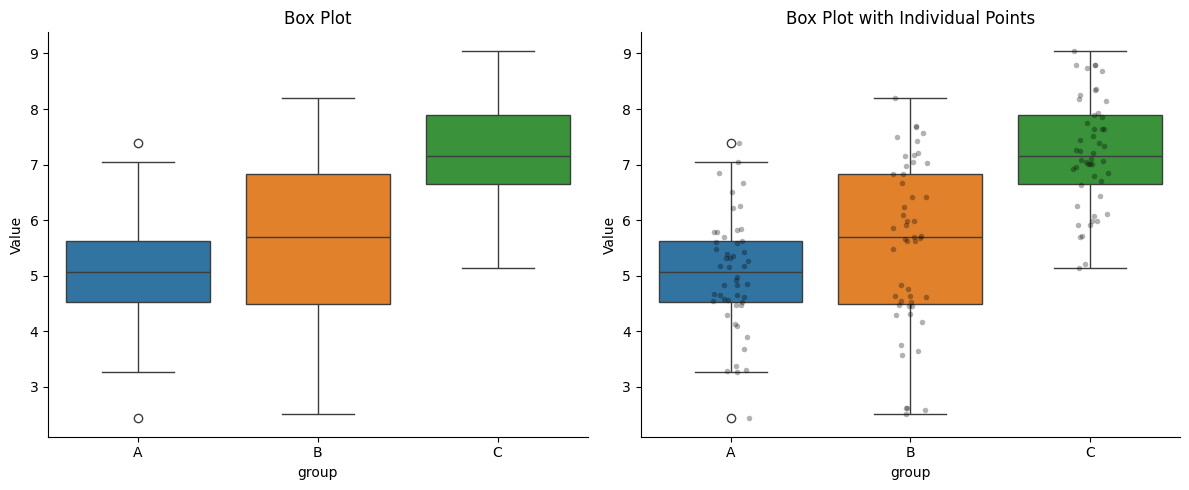

In [54]:
# Create sample categorical data
categorical_data = pd.DataFrame({
    'group': np.repeat(['A', 'B', 'C'], 50),
    'value': np.concatenate([
        rng.normal(5, 1, 50),
        rng.normal(6, 1.5, 50),
        rng.normal(7, 1, 50)
    ])
})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Box plot
sns.boxplot(data=categorical_data, x='group', y='value', ax=ax1, hue='group') #notice that we change the color by group
ax1.set_title('Box Plot')
ax1.set_ylabel('Value')

# Box plot with individual points overlaid
sns.boxplot(data=categorical_data, x='group', y='value', ax=ax2, hue='group')
sns.stripplot(data=categorical_data, x='group', y='value', ax=ax2, 
              color='black', alpha=0.3, size=4)
ax2.set_title('Box Plot with Individual Points')
ax2.set_ylabel('Value')

plt.tight_layout()
plt.show()

### Heatmaps

Heatmaps are useful for visualizing 2D arrays of data, particularly correlation matrices or contingency tables.

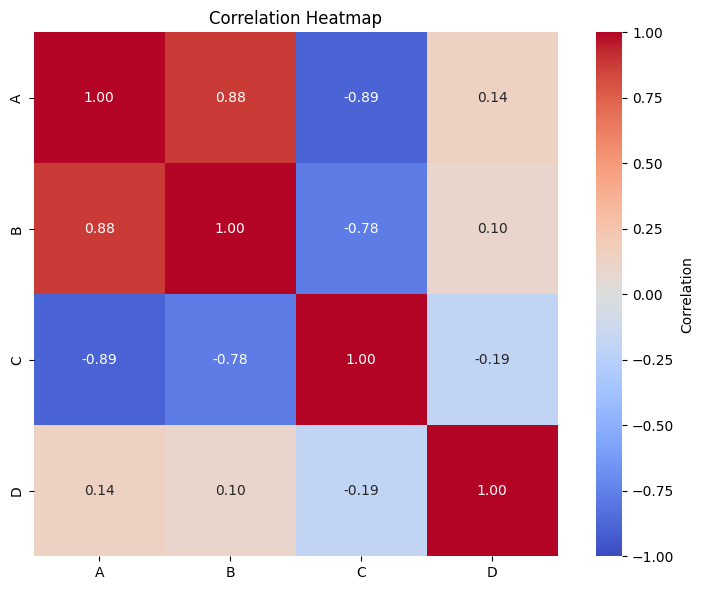

In [55]:
# Create a correlation matrix from a larger dataset
correlation_data = pd.DataFrame({
    'A': rng.standard_normal(100),
    'B': rng.standard_normal(100),
    'C': rng.standard_normal(100),
    'D': rng.standard_normal(100)
})

# Add some correlation structure
correlation_data['B'] = correlation_data['A'] + rng.normal(0, 0.5, 100)
correlation_data['C'] = -correlation_data['A'] + rng.normal(0, 0.5, 100)

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation'})

ax.set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

### Multi-plot Grids

The `FacetGrid` function allows you to create grids of plots, one for each value of a categorical variable. This is powerful for comparing patterns across different subsets of data.

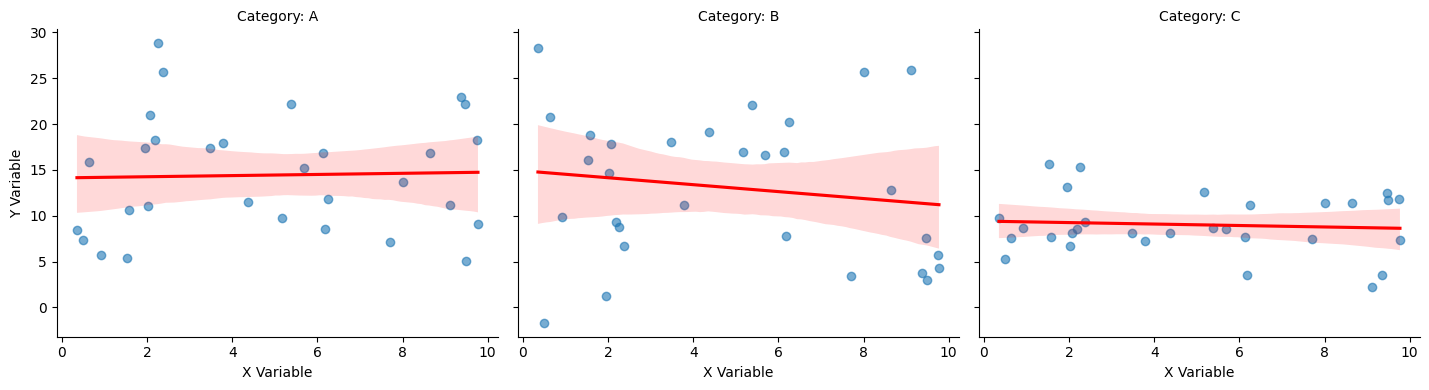

In [56]:
# Create data with multiple categories
facet_data = pd.DataFrame({
    'x': np.tile(rng.uniform(0, 10, 30), 3),
    'y': np.concatenate([
        2 * rng.uniform(0, 10, 30) + 5 + rng.normal(0, 2, 30),
        3 * rng.uniform(0, 10, 30) + rng.normal(0, 2, 30),
        rng.uniform(5, 15, 30) + rng.normal(0, 2, 30)
    ]),
    'category': np.repeat(['A', 'B', 'C'], 30)
})

# Create faceted plot
g = sns.FacetGrid(facet_data, col='category', height=4, aspect=1.2)
g.map(sns.regplot, 'x', 'y', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
g.set_titles('Category: {col_name}')
g.set_axis_labels('X Variable', 'Y Variable')

plt.tight_layout()
plt.show()

## Interactive Plotting with Plotly

`plotly` is a powerful library for creating interactive, web-based visualizations. Unlike `matplotlib`, which creates static images, plotly plots are interactive and allow users to:

- **Hover** over data points to see values
- **Zoom and pan** to focus on regions of interest
- **Toggle** data series on and off using the legend
- **Export** plots as PNG images

Plotly integrates seamlessly with pandas DataFrames through the `plotly.express` module, which provides a simple interface similar to `seaborn`.

Plotly also supports 3D plotting and statistical plots, making it a versatile tool for data visualization. 

All these features make `plotly` a great choice for interactive **dashboards**: these are simple web applications that allow users to explore data through interactive visualizations.

In [57]:
import plotly.express as px
import plotly.graph_objects as go

### Basic Interactive Scatter Plot

Creating an interactive scatter plot with plotly is straightforward using `plotly.express.scatter()`.

In [58]:
# Load a sample dataset
iris_data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

print(iris_data.head())
print(f"\nDataset shape: {iris_data.shape}")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset shape: (150, 5)


In [59]:
# Create an interactive scatter plot
fig = px.scatter(iris_data, x='sepal_length', y='sepal_width', 
                  color='species', size='petal_length',
                  hover_name='species',
                  hover_data={'sepal_length': ':.2f', 'sepal_width': ':.2f', 'species': True},
                  title='Interactive Iris Dataset Scatter Plot')

fig.show()

### Interactive 3D Scatter Plot

Plotly can create interactive 3D scatter plots where you can rotate the plot using your mouse.

In [60]:
# Create an interactive 3D scatter plot
fig = px.scatter_3d(iris_data, x='sepal_length', y='sepal_width', z='petal_length',
                     color='species', size='petal_width',
                     hover_name='species',
                     title='Interactive 3D Iris Dataset',
                     labels={'sepal_length': 'Sepal Length',
                             'sepal_width': 'Sepal Width',
                             'petal_length': 'Petal Length'})

fig.show()

### Interactive Box and Violin Plots

Plotly also provides functions for creating interactive statistical plots.

In [61]:
# Create interactive box plot
fig = px.box(iris_data, x='species', y='sepal_length', 
              color='species', points='all',
              title='Interactive Box Plot of Sepal Length by Species')

fig.show()

In [62]:
# Create interactive violin plot
fig = px.violin(iris_data, x='species', y='sepal_length', 
                 color='species', points='outliers',
                 title='Interactive Violin Plot of Sepal Length by Species')

fig.show()

### Interactive Line Plots with Multiple Series

Line plots with plotly allow you to interactively toggle series on and off.

In [63]:
# Create sample time series data
dates = pd.date_range('2024-01-01', periods=100)

time_series_data = pd.DataFrame({
    'Date': dates,
    'Series A': np.cumsum(rng.standard_normal(100)) + 10,
    'Series B': np.cumsum(rng.standard_normal(100)) + 15,
    'Series C': np.cumsum(rng.standard_normal(100)) + 12
})

# Melt the data for plotly format
melted_data = time_series_data.melt(id_vars=['Date'], 
                                     var_name='Series', 
                                     value_name='Value')

# Create interactive line plot
fig = px.line(melted_data, x='Date', y='Value', color='Series',
               title='Interactive Time Series Data',
               labels={'Value': 'Cumulative Sum', 'Series': 'Data Series'})

fig.show()

### Advanced: Subplots with Plotly

For more complex layouts, use `plotly.subplots.make_subplots()` to create grids of plots.

In [64]:
from plotly.subplots import make_subplots

# Create subplots: 2 rows, 2 columns
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Scatter', 'Box', 'Histogram', 'Violin'),
    specs=[[{'type': 'scatter'}, {'type': 'box'}],
           [{'type': 'histogram'}, {'type': 'violin'}]]
)

# Add scatter plot
fig.add_trace(
    go.Scatter(x=iris_data['sepal_length'], y=iris_data['sepal_width'],
               mode='markers', name='Scatter', marker=dict(size=8, color=iris_data.index)),
    row=1, col=1
)

# Add box plot for each species
for species in iris_data['species'].unique():
    fig.add_trace(
        go.Box(y=iris_data[iris_data['species'] == species]['sepal_length'], name=species),
        row=1, col=2
    )

# Add histogram
fig.add_trace(
    go.Histogram(x=iris_data['sepal_length'], name='Histogram'),
    row=2, col=1
)

# Add violin plot
for species in iris_data['species'].unique():
    fig.add_trace(
        go.Violin(y=iris_data[iris_data['species'] == species]['sepal_width'], name=species),
        row=2, col=2
    )

fig.update_xaxes(title_text='Sepal Length', row=1, col=1)
fig.update_yaxes(title_text='Sepal Width', row=1, col=1)

fig.update_xaxes(title_text='Species', row=1, col=2)
fig.update_yaxes(title_text='Sepal Length', row=1, col=2)

fig.update_xaxes(title_text='Sepal Length', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=1)

fig.update_xaxes(title_text='Species', row=2, col=2)
fig.update_yaxes(title_text='Sepal Width', row=2, col=2)

fig.update_layout(height=800, title_text='Multi-plot Comparison with Plotly')

fig.show()

## Comparison and Best Practices

### When to use each library:

| Library | Use Case | Strengths | Limitations |
|---------|----------|-----------|-------------|
| **Matplotlib (3D)** | Academic publications, static images | Full control, publication-ready | Static, requires more code |
| **Seaborn** | Statistical analysis, exploratory data analysis | Beautiful defaults, statistical features | Less customizable, static plots |
| **Plotly** | Interactive dashboards, web applications, presentations | Interactive, web-ready, modern look | Heavier file sizes, learning curve |

### Recommendations:

1. **Start with Seaborn** for quick exploratory data analysis with minimal code.
2. **Use Matplotlib (with 3D)** when you need publication-quality figures with precise control.
3. **Choose Plotly** when interactivity is important or when creating web-based dashboards.
4. **Combine libraries**: Use pandas to prepare data, seaborn for initial exploration, and plotly for presentations.

### Data preparation with pandas:

All three libraries work seamlessly with pandas DataFrames:
- Both `matplotlib` and `seaborn` accept DataFrames through the `data=` parameter
- `plotly.express` functions work directly with DataFrames
- For `matplotlib`'s 3D plots, extract arrays using `.to_numpy()` or access columns directly